In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Categorizar FFMC
def categorize_ffmc(value):
    if value <= 30:
        return 'Bajo'
    elif value <= 60:
        return 'Moderado'
    elif value <= 80:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DMC
def categorize_dmc(value):
    if value <= 10:
        return 'Bajo'
    elif value <= 20:
        return 'Moderado'
    elif value <= 30:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DC
def categorize_dc(value):
    if value <= 100:
        return 'Bajo'
    elif value <= 200:
        return 'Moderado'
    elif value <= 300:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar ISI
def categorize_isi(value):
    if value <= 3:
        return 'Bajo'
    elif value <= 6:
        return 'Moderado'
    elif value <= 12:
        return 'Alto'
    else:
        return 'Muy Alto'

In [3]:
# Aplicar las funciones de categorización
df['FFMC_category'] = df['FFMC'].apply(categorize_ffmc)
df['DMC_category'] = df['DMC'].apply(categorize_dmc)
df['DC_category'] = df['DC'].apply(categorize_dc)
df['ISI_category'] = df['ISI'].apply(categorize_isi)

In [5]:
X = df.drop('area', axis=1)
y = df['area']


In [10]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento y modelo
numeric_features = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['day', 'FFMC_category', 'DMC_category', 'DC_category', 'ISI_category']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 110.508061520055
R²: -0.035992373774221154


/home/mcabre/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
joblib.dump(model, 'forestfire_model.pkl')

['forestfire_model.pkl']

R² en el conjunto de prueba: -0.035992373774221154


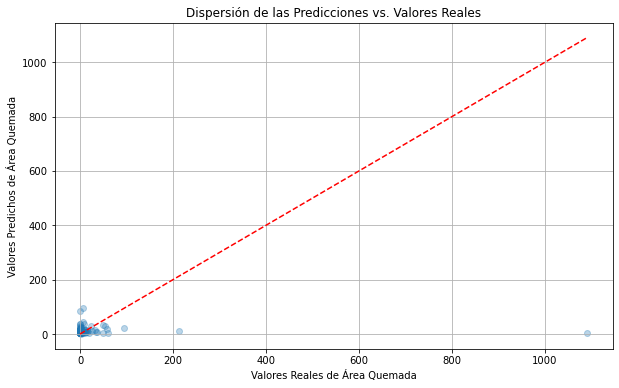

R² en el conjunto de entrenamiento: 0.812695291611231


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)

# Funciones de categorización
def categorize_ffmc(value):
    if value <= 30:
        return 'Bajo'
    elif value <= 60:
        return 'Moderado'
    elif value <= 80:
        return 'Alto'
    else:
        return 'Muy Alto'

def categorize_dmc(value):
    if value <= 10:
        return 'Bajo'
    elif value <= 20:
        return 'Moderado'
    elif value <= 30:
        return 'Alto'
    else:
        return 'Muy Alto'

def categorize_dc(value):
    if value <= 100:
        return 'Bajo'
    elif value <= 200:
        return 'Moderado'
    elif value <= 300:
        return 'Alto'
    else:
        return 'Muy Alto'

def categorize_isi(value):
    if value <= 3:
        return 'Bajo'
    elif value <= 6:
        return 'Moderado'
    elif value <= 12:
        return 'Alto'
    else:
        return 'Muy Alto'

def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

# Aplicar las funciones de categorización
df['FFMC_category'] = df['FFMC'].apply(categorize_ffmc)
df['DMC_category'] = df['DMC'].apply(categorize_dmc)
df['DC_category'] = df['DC'].apply(categorize_dc)
df['ISI_category'] = df['ISI'].apply(categorize_isi)
df['area_category'] = df['area'].apply(area_cat)

# Seleccionar características y etiqueta
numeric_features = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['day', 'FFMC_category', 'DMC_category', 'DC_category', 'ISI_category']
X = df[numeric_features + categorical_features]
y = df['area']

# Preprocesamiento: Estandarizar características numéricas y codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Configuración del modelo (Random Forest)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model_pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Calcular R² en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
print(f"R² en el conjunto de prueba: {r2}")

# Gráfico de dispersión de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Dispersión de las Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales de Área Quemada')
plt.ylabel('Valores Predichos de Área Quemada')
plt.grid(True)
plt.show()

# Predecir en el conjunto de entrenamiento
y_train_pred = model_pipeline.predict(X_train)

# Calcular R² en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
print(f"R² en el conjunto de entrenamiento: {r2_train}")
